In [3]:
!pip3 install time

ERROR: Could not find a version that satisfies the requirement time (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
ERROR: No matching distribution found for time


In [4]:
import numpy as py
import matplotlib as plt

In [5]:
!git add main.ipynb

In [6]:
!git commit -m "Import libraries"

[main (root-commit) b97ae56] Import libraries
 Committer: Khushbu Borwal <khushbuborwal@khushbus-air.wifi.uc.edu>
Your name and email address were configured automatically based
on your username and hostname. Please check that they are accurate.
You can suppress this message by setting them explicitly. Run the
following command and follow the instructions in your editor to edit
your configuration file:

    git config --global --edit

After doing this, you may fix the identity used for this commit with:

    git commit --amend --reset-author

 1 file changed, 23 insertions(+)
 create mode 100644 main.ipynb


In [7]:
!git push

Enumerating objects: 3, done.
Counting objects: 100% (3/3), done.
Delta compression using up to 4 threads
Compressing objects: 100% (2/2), done.
Writing objects: 100% (3/3), 429 bytes | 429.00 KiB/s, done.
Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
To https://github.com/khushabuborwal/CS6037ML-Group-Assignments-4-Delta-Training.git
 * [new branch]      main -> main


In [10]:
# Define the y concept: x1 + 3 * x2 - 2 > 0
def target_concept(x1, x2):
    return 1 if (x1 + 3 * x2 - 2) > 0 else 0

In [11]:
# Generate 200 random examples (x1, x2) and assign class based on y concept
np.random.seed(0)  # for reproducibility
num_samples = 200
x1_values = np.random.uniform(-5, 5, num_samples)
x2_values = np.random.uniform(-5, 5, num_samples)
Y = np.array([target_concept(x1, x2) for x1, x2 in zip(x1_values, x2_values)])

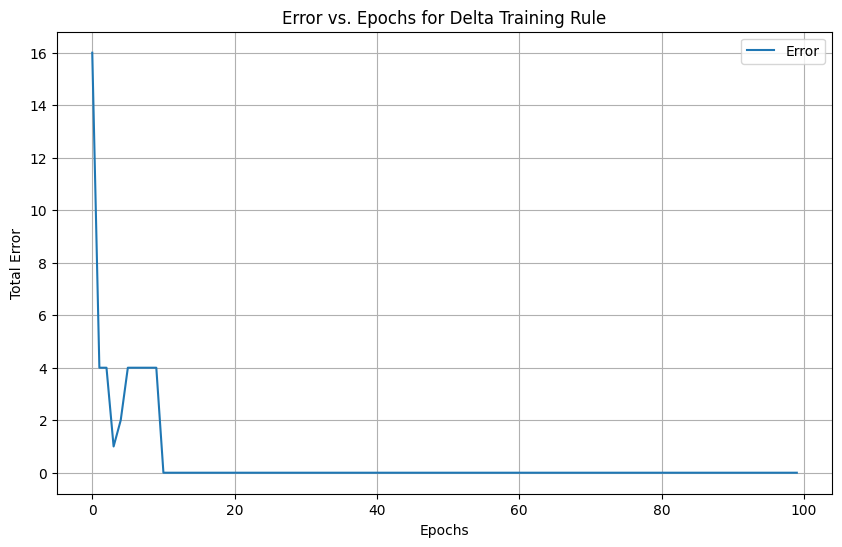

In [12]:
# Initialize weights and learning rate
weights = np.random.uniform(-1, 1, 3)  # [w1, w2, bias]
learning_rate = 0.01
epochs = 100
errors = []

# Training using delta rule
for epoch in range(epochs):
    total_error = 0
    for x1, x2, y in zip(x1_values, x2_values, Y):
        # Calculate output with current weights
        weighted_sum = weights[0] * x1 + weights[1] * x2 + weights[2]
        output = 1 if weighted_sum > 0 else 0
        
        # Calculate error (delta)
        error = y - output
        total_error += abs(error)
        
        # Update weights
        weights[0] += learning_rate * error * x1
        weights[1] += learning_rate * error * x2
        weights[2] += learning_rate * error  # bias adjustment
    
    # Record the total error for this epoch
    errors.append(total_error)

# Plot the error as a function of epochs
plt.figure(figsize=(10, 6))
plt.plot(errors, label='Error')
plt.xlabel('Epochs')
plt.ylabel('Total Error')
plt.title('Error vs. Epochs for Delta Training Rule')
plt.legend()
plt.grid(True)
plt.show()
